In [113]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
# Load Data
# Dataset 1: stanford open policing project
# https://openpolicing.stanford.edu/data
# https://github.com/5harad/openpolicing/blob/master/DATA-README.md
RI = pd.read_csv('./data/police.csv')

In [115]:
RI.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [116]:
# number rows, number columns
RI.shape

(91741, 15)

In [117]:
RI.dtypes # data types per column

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [118]:
RI.isnull().sum() # T/F array => sum

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [119]:
# Remove column that is all missing
RI.dropna(axis=1, how='all', inplace=True)
RI.shape, RI.columns

((91741, 14),
 Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
        'driver_age', 'driver_race', 'violation_raw', 'violation',
        'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
        'stop_duration', 'drugs_related_stop'],
       dtype='object'))

In [120]:
RI[RI.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

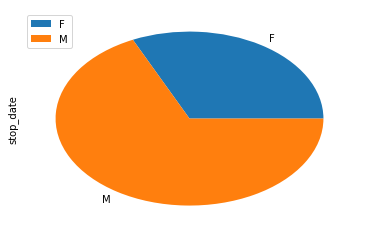

In [121]:
# M / F speed more often
RI_VIOLATION = RI[RI['violation'] == 'Speeding'].groupby(['driver_gender']).count()
RI_VIOLATION.plot.pie(y='stop_date')

/Users/cullrya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


False    2922
True      274
Name: search_type, dtype: int64

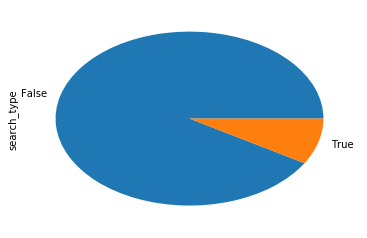

In [179]:
RI_SEARCH = RI[RI['search_conducted'] == True]
RI_SEARCH.was_frisked = RI_SEARCH.search_type.str.contains('Frisk')
value_counts = RI_SEARCH.was_frisked.value_counts()
value_counts.plot.pie()
value_counts

In [232]:
RI['stop_datetime'] = pd.to_datetime(RI.stop_date.str.cat(RI.stop_time, sep=' '))
RI['year'] = RI.stop_datetime.dt.year

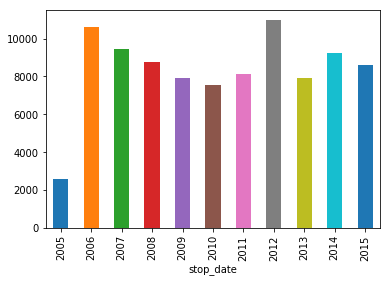

In [233]:
RI.groupby(RI.stop_datetime.dt.year)['year'].count().plot.bar()

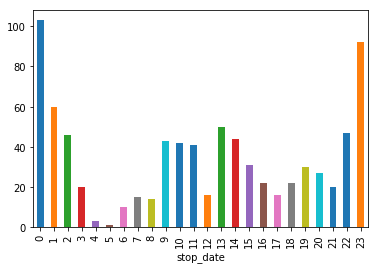

In [234]:
RI[RI['drugs_related_stop'] == True].groupby(RI.stop_datetime.dt.hour)['drugs_related_stop'].count().plot.bar()

In [296]:
import numpy as np
df = RI.copy()
df['stop_duration'].replace('1', np.NaN, inplace=True)
df['stop_duration'].replace('2', np.NaN, inplace=True)
df.loc[(df.stop_duration == '1') | (df.stop_duration == '2')] = np.NaN
set(df['stop_duration'])

{nan, '0-15 Min', '30+ Min', '16-30 Min'}

In [280]:
set(RI['stop_duration'])

{nan, '0-15 Min', '30+ Min', '16-30 Min'}

In [286]:
float('inf') > 1

True